Load the usual libraries

In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv

Load in all data sets that we've created, and add the probability to remain in the same state as a column

In [2]:
sticky_random_50_percent = read_csv(os.getcwd() + "/prob_remain_50_percent.dat", sep=" ")
sticky_random_75_percent = read_csv(os.getcwd() + "/prob_remain_75_percent.dat", sep=" ")
sticky_random_95_percent = read_csv(os.getcwd() + "/prob_remain_95_percent.dat", sep=" ")
sticky_random_99_percent = read_csv(os.getcwd() + "/prob_remain_99_percent.dat", sep=" ")
sticky_random_99point9_percent = read_csv(os.getcwd() + "/prob_remain_99point9_percent.dat", sep=" ")

sticky_random_50_percent['RemainChance'] = 0.5
sticky_random_75_percent['RemainChance'] = 0.75
sticky_random_95_percent['RemainChance'] = 0.95
sticky_random_99_percent['RemainChance'] = 0.99
sticky_random_99point9_percent['RemainChance'] = 0.999

Unite all the data sets and remove unimportant columns

In [3]:
sticky_random = pd.concat([sticky_random_50_percent, sticky_random_75_percent, sticky_random_95_percent, sticky_random_99_percent, sticky_random_99point9_percent])
sticky_random.drop(labels=['ElapsedTime', 'Run'], axis=1, inplace=True)

Create an additional column, the average score per step taken.  (Essentially a measure of how efficient a strategy was.)

In [4]:
sticky_random["AvgScorePerStep"] = sticky_random["CumulScore"]/sticky_random["NumberSteps"]

print(sticky_random.columns)
print(len(sticky_random))

Index(['NumberSteps', 'CumulScore', 'RemainChance', 'AvgScorePerStep'], dtype='object')
21000


Create a histogram of the number of steps that were performed for each RemainChance.

To make the histograms easier to see, we do not include the 99.9% data set and we remove outlier events.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14c3a791c470>,
      dtype=object)

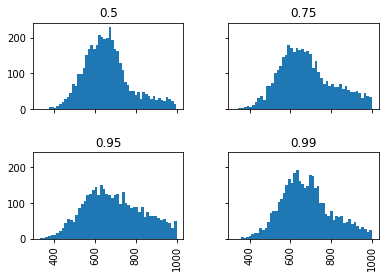

In [5]:
reduced_sticky_random = sticky_random.loc[(sticky_random['NumberSteps'] <= 1000) & (sticky_random["RemainChance"] < 0.999)]
reduced_sticky_random.hist(column="NumberSteps", by="RemainChance", bins=50, sharex=True, sharey=True)

Create a histogram of the cumulative score that were achieved for each RemainChance.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b2459b8ec50>,
      dtype=object)

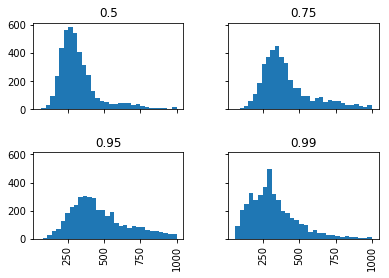

In [47]:
reduced_sticky_random = sticky_random.loc[(sticky_random['CumulScore'] <= 1000) & (sticky_random["RemainChance"] < 0.999)]
reduced_sticky_random.hist(column="CumulScore", by="RemainChance", bins=30, sharex=True, sharey=True)

Create a histogram of the average score per step for each RemainChance.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b245b97a8d0>,
      dtype=object)

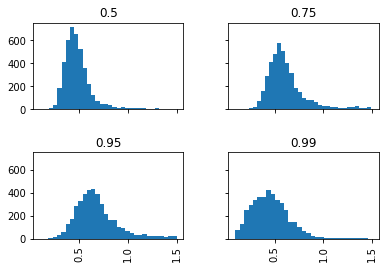

In [70]:
reduced_sticky_random = sticky_random.loc[(sticky_random["AvgScorePerStep"] < 1.5) & (sticky_random["RemainChance"] < 0.999)]
reduced_sticky_random.hist(column="AvgScorePerStep", by="RemainChance", bins=30, sharex=True, sharey=True)

Output the averages for the cumulative scores

In [65]:
print("CumulScore Mean (50%): ", sticky_random_50_percent["CumulScore"].mean())
print("CumulScore Med. (50%): ", sticky_random_50_percent["CumulScore"].median())
#print("CumulScore Mode (50%): ", sticky_random_50_percent["CumulScore"].mode())
print()
print("CumulScore Mean (75%): ", sticky_random_75_percent["CumulScore"].mean())
print("CumulScore Med. (75%): ", sticky_random_75_percent["CumulScore"].median())
#print("CumulScore Mode (75%): ", sticky_random_75_percent["CumulScore"].mode())
print()
print("CumulScore Mean (95%): ", sticky_random_95_percent["CumulScore"].mean())
print("CumulScore Med. (95%): ", sticky_random_95_percent["CumulScore"].median())
#print("CumulScore Mode (95%): ", sticky_random_95_percent["CumulScore"].mode())
print()
print("CumulScore Mean (99%): ", sticky_random_99_percent["CumulScore"].mean())
print("CumulScore Med. (99%): ", sticky_random_99_percent["CumulScore"].median())
#print("CumulScore Mode (99%): ", sticky_random_99_percent["CumulScore"].mode())
print()
print("CumulScore Mean (99.9%): ", sticky_random_99point9_percent["CumulScore"].mean())
print("CumulScore Med. (99.9%): ", sticky_random_99point9_percent["CumulScore"].median())
#print("CumulScore Mode (99.9%): ", sticky_random_99point9_percent["CumulScore"].mode())

CumulScore Mean (50%):  341.3690476190476
CumulScore Med. (50%):  290.0

CumulScore Mean (75%):  464.4714285714286
CumulScore Med. (75%):  380.0

CumulScore Mean (95%):  544.597619047619
CumulScore Med. (95%):  440.0

CumulScore Mean (99%):  341.9952380952381
CumulScore Med. (99%):  300.0

CumulScore Mean (99.9%):  144.2904761904762
CumulScore Med. (99.9%):  90.0


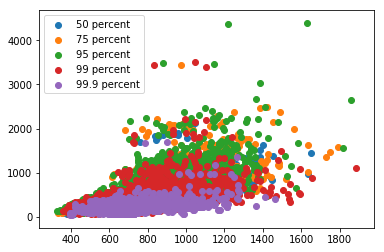

In [52]:
plt.scatter(sticky_random_50_percent["NumberSteps"], sticky_random_50_percent["CumulScore"], label="50 percent")
plt.scatter(sticky_random_75_percent["NumberSteps"], sticky_random_75_percent["CumulScore"], label="75 percent")
plt.scatter(sticky_random_95_percent["NumberSteps"], sticky_random_95_percent["CumulScore"], label="95 percent")
plt.scatter(sticky_random_99_percent["NumberSteps"], sticky_random_99_percent["CumulScore"], label="99 percent")
plt.scatter(sticky_random_99point9_percent["NumberSteps"], sticky_random_99point9_percent["CumulScore"], label="99.9 percent")
plt.legend()